In [1]:
## Frequent Transaction in a Short Period

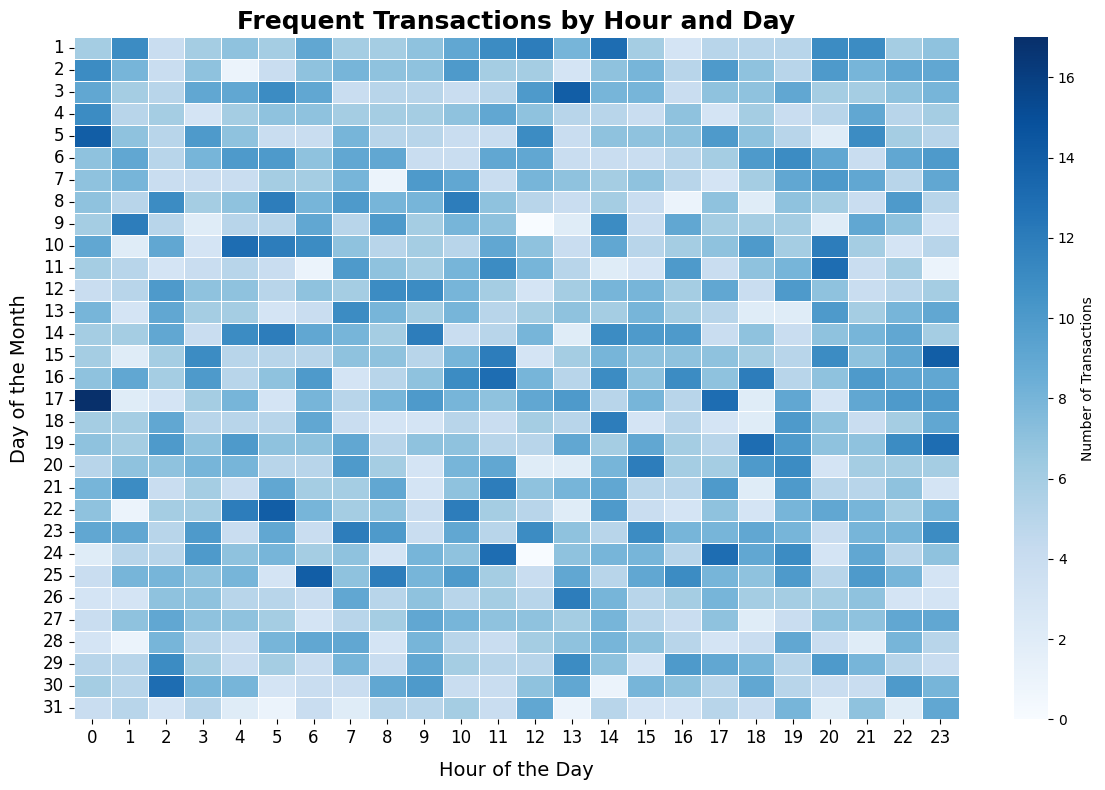

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps

# Load the dataset
file_path = 'cleaned_digital_wallet_transactions.csv'
data = pd.read_csv(file_path)

# Convert transaction_date to datetime format for easier manipulation
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

# Group data by day and hour to count the number of transactions
heatmap_data = data.groupby(['transaction_day', 'transaction_hour']).size().reset_index(name='transaction_count')

# Create a pivot table for the heatmap
heatmap_pivot = heatmap_data.pivot(index='transaction_day', columns='transaction_hour', values='transaction_count').fillna(0)

# Customizing the color map for a more professional look
cmap = colormaps.get_cmap("Blues")

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_pivot, 
    annot=False,  # Removed annotations
    cmap=cmap, 
    cbar_kws={'label': 'Number of Transactions'}, 
    linewidths=0.5, 
    linecolor='white'
)
plt.title('Frequent Transactions by Hour and Day', fontsize=18, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14, labelpad=10)
plt.ylabel('Day of the Month', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
"""
The heatmap visualizes the frequency of transactions based on two dimensions:

Day of the Month (rows): Represents each day in the dataset.
Hour of the Day (columns): Represents each hour of the day.
Key Features:
Color Intensity:

Darker shades of blue indicate higher transaction volumes during that specific day and hour.
Lighter shades indicate lower transaction volumes.
Time-Specific Patterns:

Rows (days) allow you to observe daily transaction trends, such as whether certain days are more active overall.
Columns (hours) show hourly transaction trends, highlighting peak transaction times.
Insights and Interpretations:
Peak Activity Hours:

If certain hours have consistently darker shades across multiple days, it suggests a recurring peak activity period. For instance, high transaction volumes during 6 PM to 8 PM might reflect evening shopping trends or bill payments.
Anomalous Activity:

Unusually dark cells for less typical hours (e.g., 2 AM or 3 AM) could indicate suspicious activity such as bot-like transactions or fraudulent behavior, as these are less common times for legitimate user activity.
Daily Variability:

Days with consistent high transaction volumes might correspond to payday cycles, promotional events, or seasonal behavior. Outliers (e.g., a single day with a sudden spike) may warrant investigation.
Fraudulent Behavior Patterns:

If a particular user or group of users is associated with high-frequency transactions during odd times (e.g., late-night hours), it might indicate potential fraud attempts like automated bots or compromised accounts.
"""